In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from surprise import KNNBasic, SVD, NormalPredictor, KNNBaseline,KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering, Reader, dataset, accuracy

# Installing Surprise package

In [5]:
conda install -c conda-forge scikit-surprise

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Jayabalan_S\Anaconda3

  added / updated specs:
    - scikit-surprise


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.3.9           |           py37_0         149 KB  conda-forge
    conda-4.7.12               |           py37_0         3.0 MB  conda-forge
    conda-package-handling-1.6.0|   py37h2fa13f4_1         700 KB  conda-forge
    joblib-0.14.0              |             py_0         197 KB  conda-forge
    scikit-surprise-1.1.0      |py37hc8d92b1_1001         608 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.6 MB

The following NEW packages will be INSTALLED:

  conda-package-han~ conda-forge/win-64::conda-package-handling-1.6.0-py37h2fa13f4_1
  joblib             conda-forge/noa



==> WARNING: A newer version of conda exists. <==
  current version: 4.6.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda


'ET' is not recognized as an internal or external command,
operable program or batch file.


# Load the dataset

In [7]:
columns = ['userID', 'productID', 'ratings','timestamp']

recomm_df = pd.read_csv('ratings_Electronics.csv',names=columns)

# Visualize the data

In [8]:
recomm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
userID       object
productID    object
ratings      float64
timestamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [9]:
recomm_df.head()

,userID,productID,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [10]:
recomm_df.shape

(7824482, 4)

In [11]:
recomm_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ratings,7824482.0,4.012337e+00,1.380910e+00,1.0,3.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
timestamp,7824482.0,1.338178e+09,6.900426e+07,912729600.0,1.315354e+09,1.361059e+09,1.386115e+09,1.406074e+09


In [12]:
recomm_df = recomm_df.drop('timestamp', axis=1)

In [13]:
recomm_df.isna().sum()

userID       0
productID    0
ratings      0
dtype: int64

In [14]:
recomm_df.shape

(7824482, 3)

# plot histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000205A7DCAE48>]],
      dtype=object)

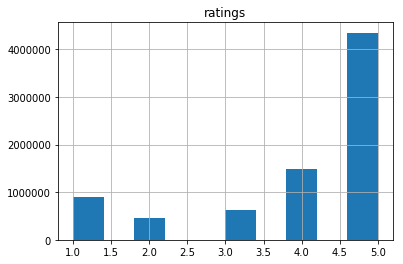

In [15]:
recomm_df.hist('ratings',bins = 10)

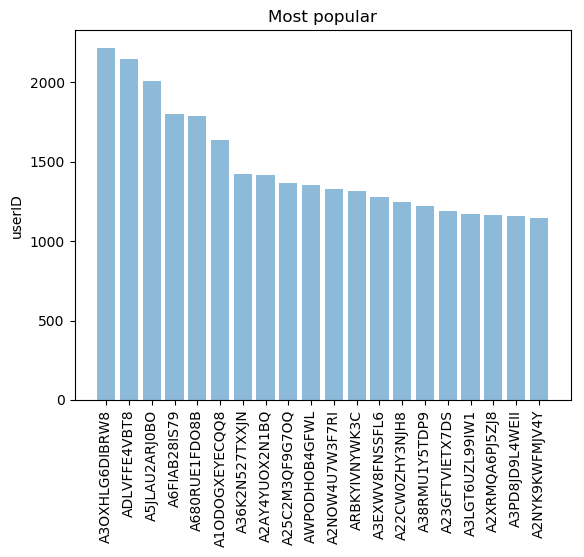

In [16]:
popular = recomm_df[['userID','ratings']].groupby('userID').sum().reset_index()
popular_20 = popular.sort_values('ratings', ascending=False).head(n=20)
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = (list(popular_20['userID']))
y_pos = np.arange(len(objects))
performance = list(popular_20['ratings'])
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('userID')
plt.title('Most popular')
 
plt.show()

In [17]:
recomm_df.userID.value_counts()

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
ARBKYIVNYWK3C     296
A25C2M3QF9G7OQ    296
A22CW0ZHY3NJH8    292
A3EXWV8FNSSFL6    282
A38RMU1Y5TDP9     282
A3LGT6UZL99IW1    279
A2NOW4U7W3F7RI    277
A23GFTVIETX7DS    270
A3PD8JD9L4WEII    266
A17BUUBOU0598B    261
A3AYSYSLHU26U9    257
A2XRMQA6PJ5ZJ8    253
A12DQZKRKTNF5E    252
A231WM2Z2JL0U3    252
A1UQBFCERIP7VJ    247
AGVWTYW0ULXHT     244
A203OCQQ12MAVT    240
AEJAGHLC675A7     239
A2NYK9KWFMJV4Y    238
A3A4ZAIBQWKOZS    236
A31N0XY2UTB25C    227
                 ... 
A1ZL5XFW3NBS0J      1
A1Z78UEFFX16ZG      1
AYUIZKGTHFB4V       1
A1PMXS6CV95SXU      1
A3S63WVXCC2KVJ      1
A6R5F0351OF8T       1
A1BJI1FUELQRJQ      1
A3C2LXKI8U1PRN      1
A1MKG2ZE2XPE34      1
ANUBDQW0NRGOT       1
A2SCA0MDVLVU3Y      1
A3JUO0C08WSDI3      1
A2XK70KOCUY5VR      1
A1N6Y1SJC7FRBC      1
A3E9Y0D7MR

In [18]:
print('Number of unique users', len(recomm_df['userID'].unique()))
print('Number of unique products', len(recomm_df['productID'].unique()))
print('Unique Ratings', recomm_df['ratings'].unique())

Number of unique users 4201696
Number of unique products 476002
Unique Ratings [5. 1. 3. 2. 4.]


In [19]:
min_ratings1 = recomm_df[(recomm_df['ratings'] < 2.0)]
print('Number of unique products rated low',len(min_ratings1['productID'].unique()))

Number of unique products rated low 176283


In [20]:
med_ratings1 = recomm_df[(recomm_df['ratings'] > 2.0) & (recomm_df['ratings'] < 4.0)]
print('Number of unique products rated medium',len(med_ratings1['productID'].unique()))

Number of unique products rated medium 152827


In [21]:
max_ratings1 = recomm_df[recomm_df['ratings'] >= 4.0]
print('Number of unique products rated high',len(max_ratings1['productID'].unique()))

Number of unique products rated high 410110


In [22]:
avg_rating_prod = recomm_df.groupby('productID').sum() / recomm_df.groupby('productID').count()
avg_rating_prod.drop('userID', axis=1,inplace =True)

In [23]:
print ('Top 10 highly rated products \n',avg_rating_prod.nlargest(10,'ratings'))

Top 10 highly rated products 
             ratings
productID          
0132793040      5.0
0321732944      5.0
059400232X      5.0
0594033934      5.0
0594287995      5.0
0594450209      5.0
0594450705      5.0
0594511488      5.0
0594514789      5.0
0594549558      5.0


# Take a subset of the dataset to make it less sparse/ denser. 

In [24]:
userID = recomm_df.groupby('userID').count()
top_user = userID[userID['ratings'] >= 50].index
topuser_ratings_df = recomm_df[recomm_df['userID'].isin(top_user)]
topuser_ratings_df.shape
topuser_ratings_df.head()

,userID,productID,ratings
94,A3BY5KCNQZXV5U,0594451647,5.0
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0


In [25]:
topuser_ratings_df.sort_values(by='ratings', ascending=False).head()

,userID,productID,ratings
94,A3BY5KCNQZXV5U,0594451647,5.0
4256669,A680RUE1FDO8B,B004M8RWDE,5.0
4258497,AOMEH9W6LHC4S,B004M8SBNE,5.0
4258199,A2GKMXRLI7KLFP,B004M8SBD4,5.0
4258099,A1UNJ46NSB352E,B004M8SBCK,5.0


# Keep data only for products that have 50 or more ratings

In [26]:
prodID = recomm_df.groupby('productID').count()
top_prod = prodID[prodID['ratings'] >= 50].index
top_ratings_df = topuser_ratings_df[topuser_ratings_df['productID'].isin(top_prod)]
top_ratings_df.sort_values(by='ratings', ascending=False).head()

,userID,productID,ratings
492,A3CLWR1UUZT6TG,0972683275,5.0
4220481,A2AY4YUOX2N1BQ,B004KJE8FU,5.0
4217715,A2Q204DY2L7YRP,B004K8WPUQ,5.0
4218748,A87CILADRIZW0,B004KA8Y4U,5.0
4219205,A11KZ906QD08C5,B004KCI80I,5.0


In [27]:
top_ratings_df.shape

(79182, 3)

# Split the data randomly into train and test dataset.

In [28]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(top_ratings_df, test_size = 0.30, random_state=0)

# Popularity recommender model

In [29]:
train_data_grouped = train_data.groupby('productID').mean().reset_index()

In [30]:
train_data_grouped.head()

,productID,ratings
0,0972683275,4.5
1,1400501466,3.0
2,1400501520,5.0
3,1400501776,4.0
4,1400532620,1.0


In [31]:
train_data_sort = train_data_grouped.sort_values(['ratings', 'productID'], ascending=False)

In [32]:
train_data.groupby('productID')['ratings'].count().sort_values(ascending=False).head(10)

productID
B0088CJT4U    135
B003ES5ZUU    128
B007WTAJTO    123
B000N99BBC    122
B008DWCRQW    102
B00829TIEK    102
B00829THK0     98
B002R5AM7C     94
B004CLYEDC     82
B004CLYEFK     76
Name: ratings, dtype: int64

In [33]:
ratings_mean_count = pd.DataFrame(train_data.groupby('productID')['ratings'].mean()) 
ratings_mean_count['rating_counts'] = pd.DataFrame(train_data.groupby('productID')['ratings'].count())
ratings_mean_count.head() 

,ratings,rating_counts
productID,,
0972683275,4.5,2
1400501466,3.0,4
1400501520,5.0,1
1400501776,4.0,1
1400532620,1.0,1


In [34]:
pred_df = test_data[['userID', 'productID', 'ratings']]

In [35]:
pred_df.rename(columns = {'ratings' : 'true_ratings'}, inplace=True)

In [36]:
pred_df = pred_df.merge(train_data_sort, left_on='productID', right_on = 'productID')
pred_df.rename(columns = {'ratings' : 'predicted_ratings'}, inplace = True)

In [37]:
import sklearn.metrics as metric
from math import sqrt
MSE = metric.mean_squared_error(pred_df['true_ratings'], pred_df['predicted_ratings'])
print('The RMSE value for Popularity Recommender model is', sqrt(MSE))

The RMSE value for Popularity Recommender model is 1.0914119718039657


In [38]:
import surprise
from surprise import KNNWithMeans
from surprise.model_selection import GridSearchCV
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

In [39]:
reader = Reader(rating_scale=(0.5, 5.0))

In [40]:
data = Dataset.load_from_df(top_ratings_df[['userID', 'productID', 'ratings']],reader)

In [41]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.3,random_state=0)

In [42]:
type(trainset)

surprise.trainset.Trainset

# Train model

In [43]:
algo_user = KNNWithMeans(k=10, min_k=6, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo_user.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [44]:
svd_model = SVD(n_factors=50,reg_all=0.02)
svd_model.fit(trainset)

# Evaluate

In [45]:
MSE = metric.mean_squared_error(pred_df['true_ratings'], pred_df['predicted_ratings'])
print('The RMSE value for Popularity Recommender model is', sqrt(MSE))

The RMSE value for Popularity Recommender model is 1.0914119718039657


In [46]:
print(len(testset))
type(testset)

23755


list

In [47]:
test_pred = algo_user.test(testset)
test_pred[0]

Prediction(uid='A28UMA3GW9L124', iid='B001GX6MJ8', r_ui=3.0, est=3.3492063492063493, details={'actual_k': 2, 'was_impossible': False})

In [48]:
accuracy.rmse(test_pred)

RMSE: 0.9941


0.9940800621800723

In [49]:
test_pred = svd_model.test(testset)

In [50]:
accuracy.rmse(test_pred)

RMSE: 0.9604


0.9603933344334855

# Parameter tuning of SVD Recommendation system

In [51]:
from surprise.model_selection import GridSearchCV
param_grid = {'n_factors' : [5,10,15], "reg_all":[0.01,0.02]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3,refit = True)

In [52]:
gs.fit(data)

In [53]:
gs.best_params
gs.test(testset)
accuracy.rmse(gs.test(testset))

RMSE: 0.8579


0.8579211291735379

In [54]:
from collections import defaultdict
def get_top_n(predictions, n=5):
  
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [55]:
top_n = get_top_n(test_pred, n=5)

In [56]:
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

A28UMA3GW9L124 ['B000VX6XL6', 'B008JJLW4M', 'B000N99BBC', 'B0002D6QJO', 'B001PUQ7PG']
A38NHXL5257E3B ['B00BOHNYU6', 'B003SGCO3E', 'B00CB2F65O', 'B003IRR0YQ', 'B00829TIEK']
A36IHC0K68NS2 ['B00HMREOLK', 'B004ING996', 'B009N8M2P6', 'B001FAACHK', 'B00ATM1MGA']
A231WM2Z2JL0U3 ['B00008OE6I', 'B000023VUL', 'B001TUYQT6', 'B00005LB8P', 'B00004RC2D']
A2AC6GQ24S45GA ['B001TOD7ME', 'B009E6J1BU', 'B009VV56TY', 'B0042TS7GE', 'B001S2RCWI']
A3OXHLG6DIBRW8 ['B001T9NUJE', 'B001TH7GVE', 'B002VPE1X4', 'B004CLYEFK', 'B007KEZMX4']
A2XA8CW5DF4MNZ ['B000TKHBDK', 'B00387EW1K', 'B001TOD7ME', 'B000AP05BO', 'B000MKKTJK']
AG35JCCQWDRCS ['B000068O16', 'B0036Q7MV0', 'B0045TYDNC', 'B004GYVPGE', 'B00AXTQQDS']
A2X3L31KCXBHCL ['B00829THEG', 'B003VNKKT4', 'B0044DEDC0', 'B00DQZQ5T6', 'B006WHPQE0']
A33YZNZIRA3H97 ['B00BOHNYTW', 'B00006I5J7', 'B00BFO14W8', 'B00HFRWWAM', 'B00C4Q61Z6']
AX05DBU8IRUWY ['B006W8U2MU', 'B001L1H0SC', 'B007WTAJTO', 'B001FO4QHI', 'B0049SCB2Y']
A296QED1MV1V0J ['B008AST7R6', 'B0058G40O8', 'B00EN27TCI',

A2GYV87WW0DMSN ['B003ES5ZUU', 'B008EQYRRY', 'B001E1Y5O6', 'B00D856NOG', 'B004LPZBD6']
A1G650TTTHEAL5 ['B009UNZ5WQ', 'B00G4UQ6U8', 'B00A35WYBA', 'B00AYQ433U', 'B00G4V0QSK']
A361M14PU2GUEG ['B000QUUFRW', 'B0015AARJI', 'B002JQNXZC', 'B000MX48VM', 'B00009R6K7']
AKT8TGIT6VVZ5 ['B000M2GYF6', 'B0007WK8KS', 'B00BOHNYTW', 'B000BY52NK', 'B00004XOM3']
A1X3ESYZ79H59E ['B004CLYEFK', 'B007KZQM9G', 'B00CD8ADKO', 'B00829THEG', 'B005I6EVUG']
A257X1MQJO82P2 ['B004W2JKWG', 'B009NHAEXE', 'B001GCU0MY', 'B008EC4O76', 'B001DYC0CS']
A2KHG3JOFXQ4CE ['B000RZQZM0', 'B003B20F54', 'B0009ON12G', 'B00391XGDA', 'B008PWUO4W']
A1VTCSCH8FFC76 ['B002WE6D44', 'B000R99GJ0', 'B002669XKY', 'B002KG6HZO', 'B000058EGT']
A1H6SBO7R007I8 ['B008ALA6DW', 'B007471PZQ', 'B009QV72VY', 'B002MUAEX4', 'B006ZH0J30']
ANYC38I00IRVK ['B00A83I8G2', 'B004HIN97M', 'B004C9P9TM', 'B003MX4D0U', 'B0058P0I2C']
A2X61KKXXR6WNP ['B0089E5R0W', 'B000J43HJ8', 'B001DJ64C0', 'B001F7HLRC', 'B0000AKVHF']
A2HDTOF8222KN3 ['B003O1UYHG', 'B007BYLO4E', 'B0009WU65I'

We had read and explored the dataset. Considered only first three columns userId, productId, and ratings.

Analysed the data and plotted the histogram based on ratings and usedID.

We had Split the data randomly into train and test dataset.

Build Popularity Recommender model and found the RMSE value for Popularity Recommender model as 1.091

Build Collaborative Filtering model.The RMSE value for Collaborative Filtering model, byKNNWithMeans is 0.9941 and SVD is 0.9606. After parameter tuning of SVD it is 0.858

We had recommended new products to each user based on his/her habits and have recommended 5 new products.
Between RMSE of Popularity and Collaborative filtering , Collaborative fitering fares better with 0.86 scores.

Collaborative filtering uses user's behaviour (in this case explicit ratings to give) similar items / similar users and recomend products accordingly

Popularity based algorithm have their used cases when user would just like to browse most popular items